In [1]:
# Import Dependencies

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [2]:
# Import and read csv's

V_2016 = pd.read_csv('resources/V_q4_2016.csv')
V_2017 = pd.read_csv('resources/V_q4_2017.csv')
V_2018 = pd.read_csv('resources/V_q4_2018.csv')

In [3]:
# Join 2016 and 2017

V_2yr_q4 = pd.concat([V_2016, V_2017], ignore_index=True)
V_2yr_q4 = V_2yr_q4.drop(columns=['Unnamed: 0'])
V_2yr_q4.to_csv('resources/V_2yr_q4.csv')
V_2yr_q4.head()

,Date,Open,High,Low,Close,Volume,Dividend
0,2016-10-03,82.42,83.1066,82.30,82.86,8155405.0,0.0
1,2016-10-04,83.28,83.5300,82.58,82.73,5771983.0,0.0
2,2016-10-05,82.96,83.4500,82.90,83.35,6163375.0,0.0
3,2016-10-06,83.12,83.4780,82.88,83.36,7687143.0,0.0
4,2016-10-07,83.49,83.7000,82.64,82.88,8219576.0,0.0


In [4]:
# Reshape for regression test

x = V_2017.Open.values.reshape(-1, 1)
y = V_2017.Close.values.reshape(-1, 1)

print("Shape: ", x.shape, y.shape)

Shape:  (63, 1) (63, 1)


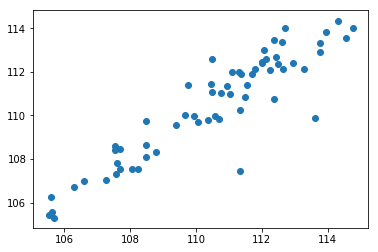

In [5]:
# Plot Scatter Graph

plt.scatter(x, y)

In [6]:
V_2017_model = LinearRegression()
V_2017_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
# Weight coefficient and y-int

print('Weight coefficients: ', V_2017_model.coef_)
print('y-axis intercept: ', V_2017_model.intercept_)

Weight coefficients:  [[0.90710263]]
y-axis intercept:  [10.22949902]


In [8]:
# x and y mins and maxs

V_2017_x_min = np.array([[x.min()]])
V_2017_x_max = np.array([[x.max()]])
print(f"Min x Value: {V_2017_x_min}")
print(f"Max x Value: {V_2017_x_max}")

V_2017_y_min = V_2017_model.predict(V_2017_x_min)
V_2017_y_max = V_2017_model.predict(V_2017_x_max)

Min x Value: [[105.54]]
Max x Value: [[114.75]]


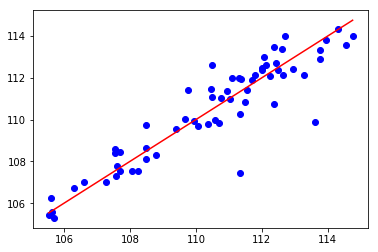

In [9]:
# Show Linear Regression

plt.scatter(x, y, c='blue')
plt.plot([V_2017_x_min[0], V_2017_x_max[0]], [V_2017_x_min[0], V_2017_x_max[0]], c='red')
plt.savefig('V_q4_regression.png')

In [10]:
V_2017_model.score(x, y)

0.840768070522841

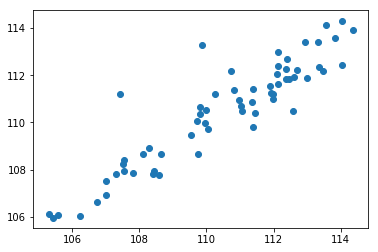

In [11]:
predictions = V_2017_model.predict(x)
plt.scatter(y, predictions)